# **선형 회귀 (Linear Regression)**
- y = 2x+3

In [5]:
!pip3 install torch torchvision # 파이토치 설치 확인

In [6]:
import numpy as np
import torch
import pandas as pd # 데이터 조작 및 분석을 위한 파이썬용 라이브러리; 숫자 테이블과 시계열 조작을 위한 데이터 구조와 연산 제공
import torch.nn as nn # Neural Network 인공 신경망 연산들이 들어있음. ex) Linear, Convolution, RNN...
import torch.optim as optim # 모델 최적화에 필요한 최적화 함수들이 들어있음. ex) SGD, ADAM, LBFGS...
import torch.nn.init as init # 텐서 초기화 함수 ex) uniform, normal, xavier...
import matplotlib.pyplot as plt # 데이터/학습 결과 출력 


## 데이터 생성

In [7]:
num_data = 1000 # 데이터 개수 1000개
num_epoch = 500 # 학습 횟수 500회

# 데이터에 추가할 노이즈가 정규분포를 따르게 만들어줌.
# 평균 디폴트 0, 편차 0.2로 지정
noise = init.normal_(torch.FloatTensor(num_data,1),std=0.2) # tensor를 정규분포에 따라 초기화; std: 편차

# -10에서 10까지 범위에서 uniform 하게 생성 -> x는 1000x1 형태, -10 ~ 10 값을 uniform 하게 갖게 됨.
x = init.uniform_(torch.Tensor(num_data,1),-10,10)

# 연산 그래프 정의; 정답 값
y = 2*x+3

# y에 noise를 더해 y_noise 만듦; 학습할 때 y_noise를 목표값으로 사용 -> 실제 데이터 사용 시 노이즈가 추가되는 경우가 많기 때문
y_noise = y+noise

## 데이터 시각화

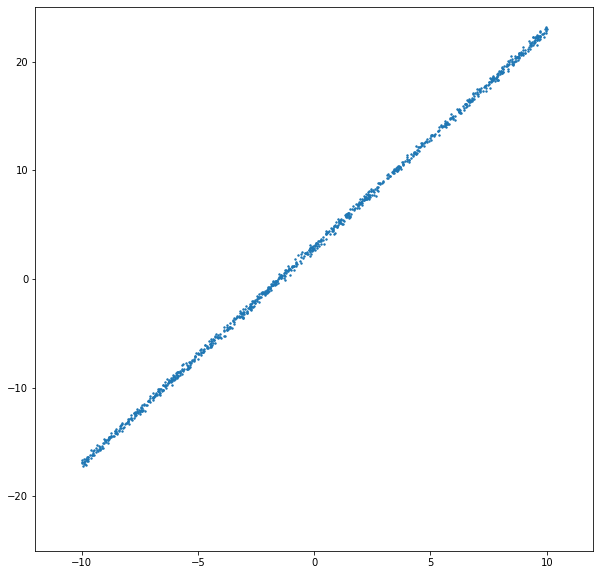

In [8]:
plt.figure(figsize=(10,10)) # figure 크기 지정 ; 가로, 세로
plt.scatter(x.numpy(),y_noise.numpy(),s=2) # 산포 그래프; x축은 x, y축은 y_noise, s = 마커 크기
plt.axis([-12,12,-25,25]) # figure의 x, y 축 범위
plt.show()

## 모델, 손실함수, 최적화 함수 설정

In [10]:
# 선형 모델 생성
# 입력으로 들어오는 x가 1000x1의 형태, 특성의 개수는 1개 -> 앞에 1이 들어감. Linear(1,?)
# 출력으로 기대하는 값도 1000x1의 형태, 특성의 개수는 1개 -> 뒤에 1이 들어감. Linear(?,1)
model = nn.Linear(1,1) 

# 손실 함수 지정 (L1 손실 사용)
loss_func = nn.L1Loss() # MAE; 기대값-예측값의 절댓값 차 | MSE에 비해 outlier에 의해 영향을 받는 정도가 감소

# 최적화 함수 지정 (SGD)
# 인수로 학습의 대상이 되는 모델의 변수 (model.parameters()) 를 전달
optimizer = optim.SGD(model.parameters(),lr=0.01)

## 모델 학습 및 중간 확인

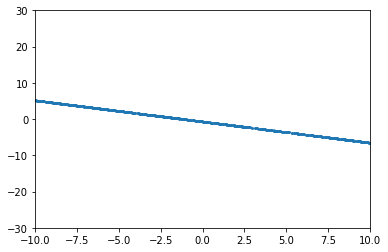

tensor(13.0903)


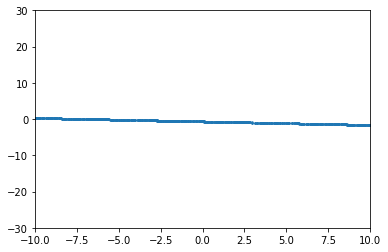

tensor(10.7193)


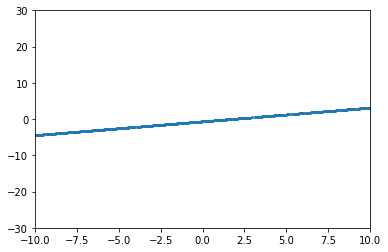

tensor(8.4434)


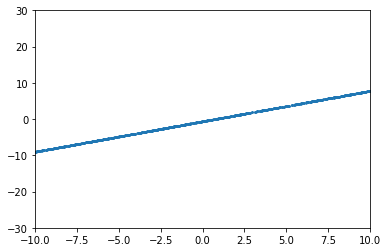

tensor(6.3295)


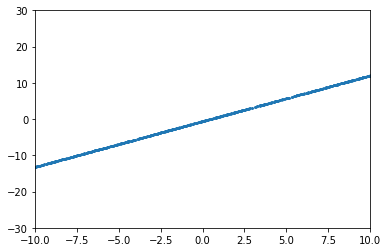

tensor(4.5481)


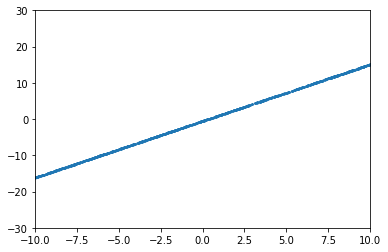

tensor(3.5966)


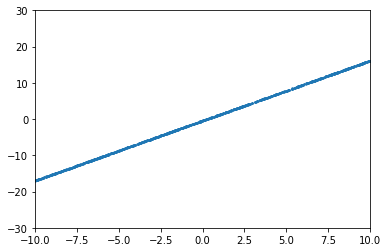

tensor(3.4164)


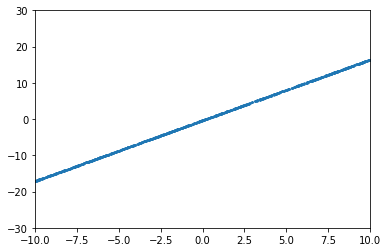

tensor(3.3157)


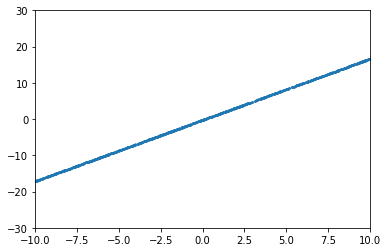

tensor(3.2166)


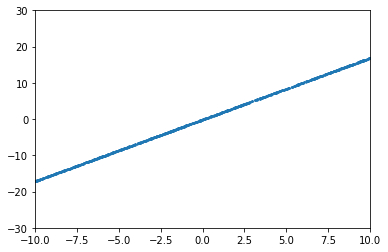

tensor(3.1176)


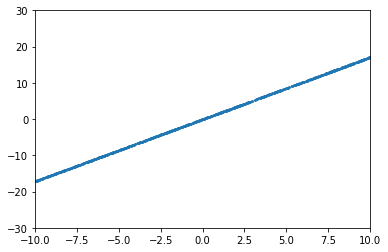

tensor(3.0186)


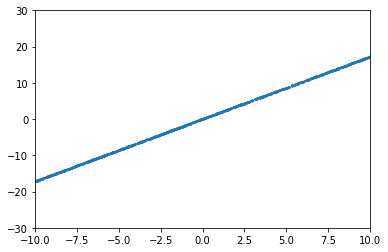

tensor(2.9196)


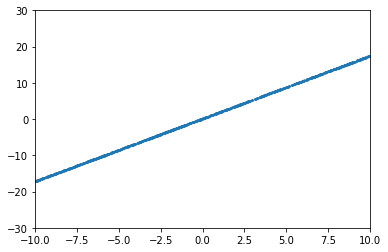

tensor(2.8207)


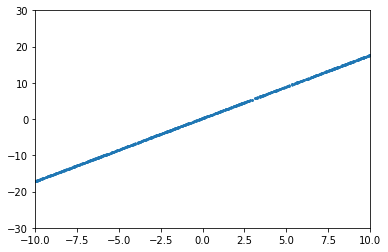

tensor(2.7217)


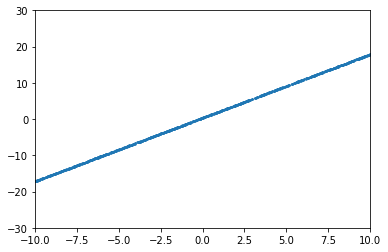

tensor(2.6227)


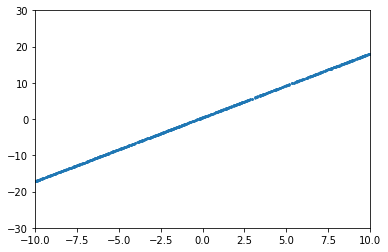

tensor(2.5237)


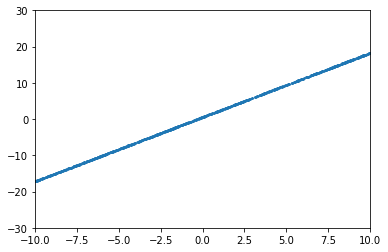

tensor(2.4248)


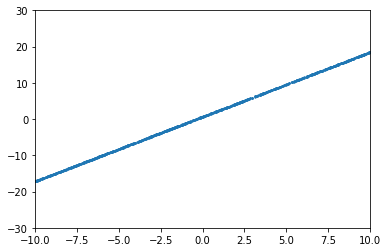

tensor(2.3258)


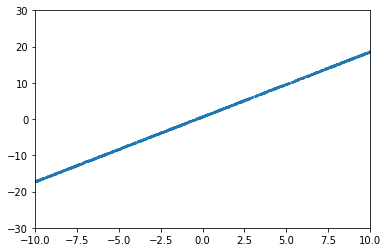

tensor(2.2268)


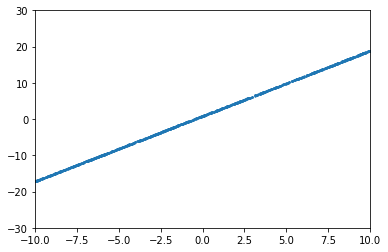

tensor(2.1279)


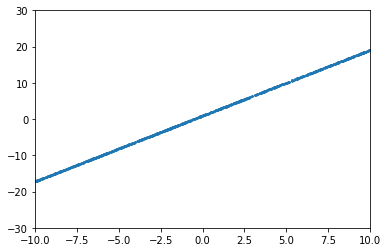

tensor(2.0289)


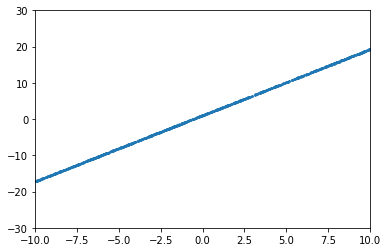

tensor(1.9299)


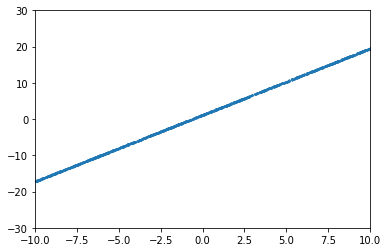

tensor(1.8310)


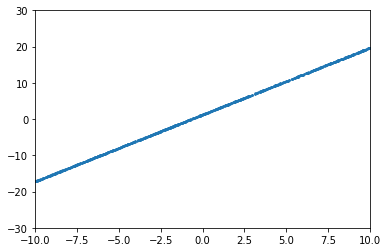

tensor(1.7320)


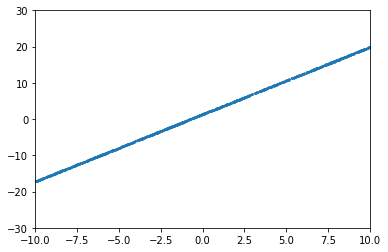

tensor(1.6331)


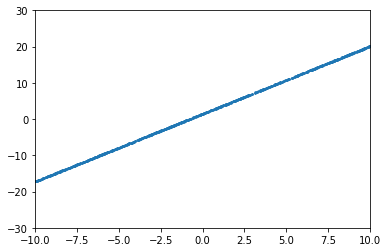

tensor(1.5341)


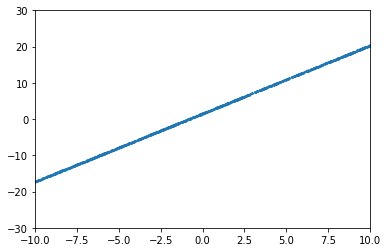

tensor(1.4353)


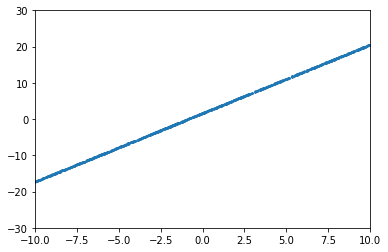

tensor(1.3364)


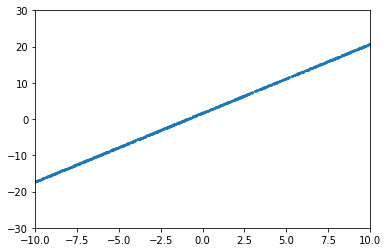

tensor(1.2376)


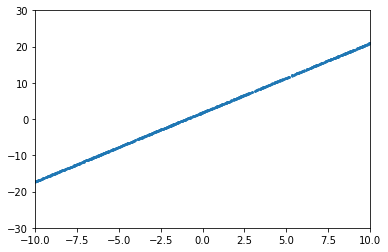

tensor(1.1388)


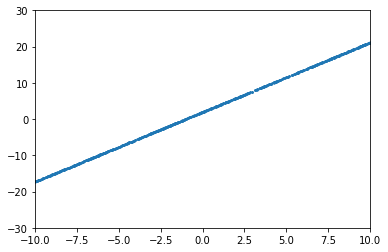

tensor(1.0401)


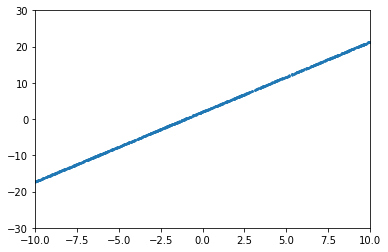

tensor(0.9414)


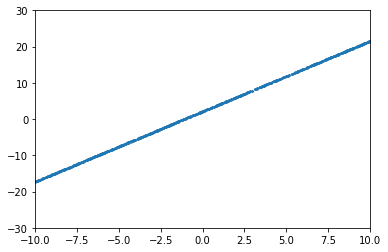

tensor(0.8428)


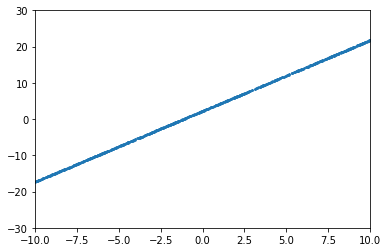

tensor(0.7443)


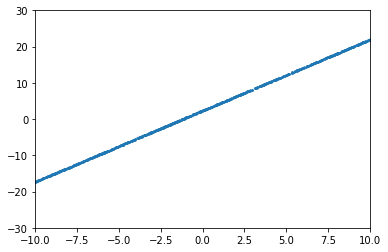

tensor(0.6459)


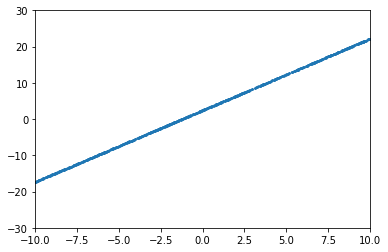

tensor(0.5483)


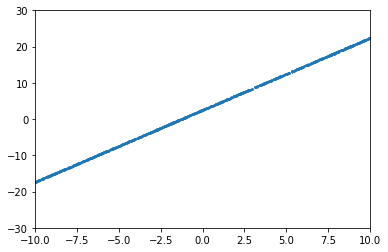

tensor(0.4531)


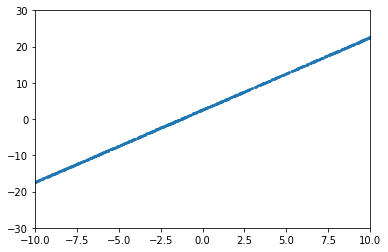

tensor(0.3660)


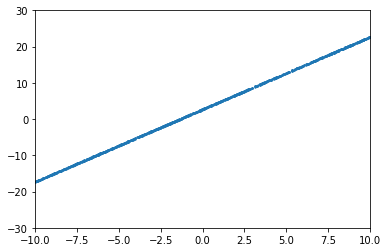

tensor(0.2933)


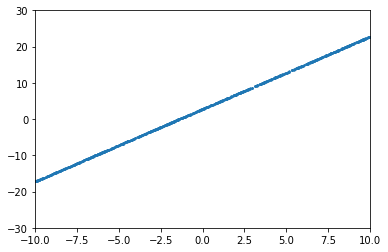

tensor(0.2385)


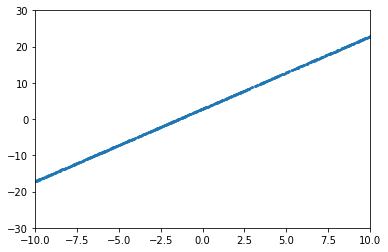

tensor(0.2036)


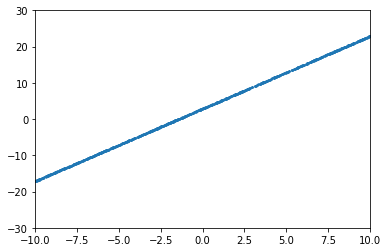

tensor(0.1838)


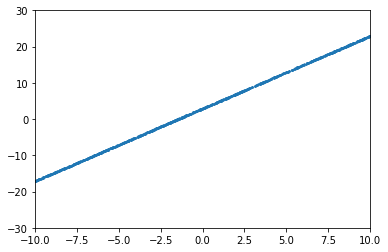

tensor(0.1729)


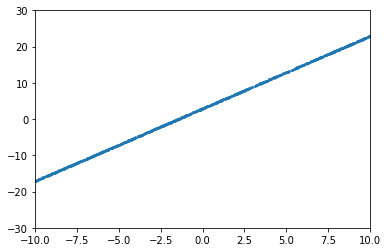

tensor(0.1679)


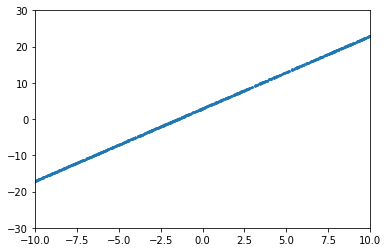

tensor(0.1658)


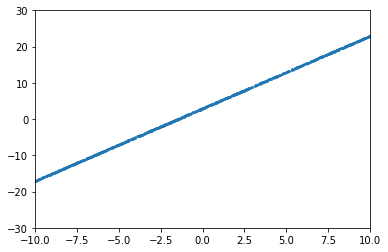

tensor(0.1647)


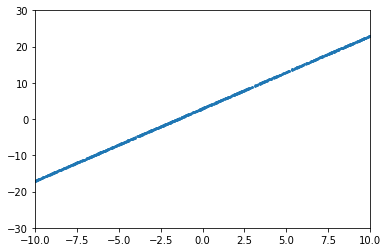

tensor(0.1643)


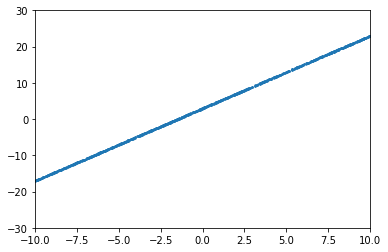

tensor(0.1641)


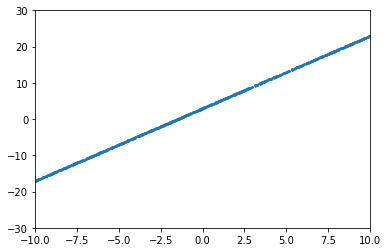

tensor(0.1640)


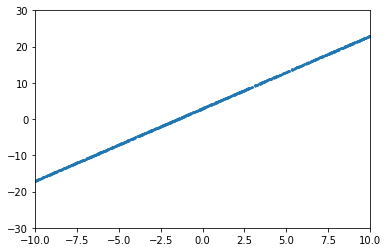

tensor(0.1640)


In [11]:
loss_arr=[] # 손실이 어떻게 변하는지 확인하기 위해 기록

label = y_noise # 목표값

for i in range(num_epoch):
  # 이전 학습의 기울기 지운 뒤, 최적화 함수 초기화; 지우지 않으면 기존의 업데이트 때문에 학습이 잘 이루어지지 않음
  optimizer.zero_grad() 

  output = model(x)

  loss = loss_func(output,label) # 결과값과 목표값의 차이를 L1 손실 함수로 구해줌.

  loss.backward() # 손실에 대한 기울기

  optimizer.step() # 계산한 기울기를 이용해 모델의 변수 업데이트

  if i %10 == 0:
    # 연산 그래프에 속해있는 x, output 값을 detach를 통해 분리, 텐서를 넘파이 배열로 바꿔서 plt.scatter에 전달
    plt.scatter(x.detach().numpy(),output.detach().numpy(),s=2)
    plt.axis([-10,10,-30,30])
    plt.show()
    print(loss.data)

  # 손실을 loss_arr에 추가
  loss_arr.append(loss.detach().numpy())


## 학습 후 데이터와 모델 결과값 확인

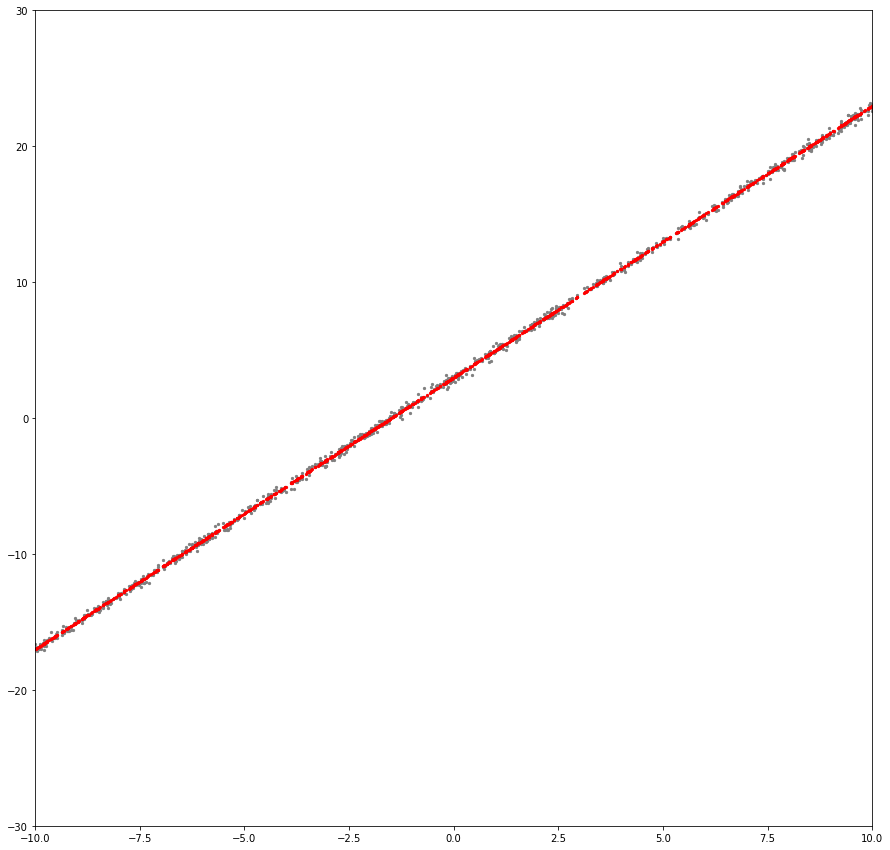

In [12]:
plt.figure(figsize=(15,15))
plt.scatter(x.numpy(),y_noise.numpy(),s=5,c="gray") # 원래 데이터
plt.scatter(x.detach().numpy(),output.detach().numpy(),s=5,c="red") # 예측 데이터
plt.axis([-10,10,-30,30])
plt.show()

## 손실 그래프

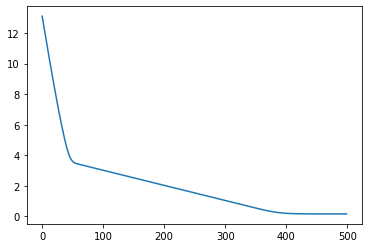

In [13]:
plt.plot(loss_arr)
plt.show()

## 학습 후 모델 변수 값 확인

In [14]:
param_list = list(model.parameters())
print("Weight:",param_list[0].item(),"\nBias:", param_list[1].item())

Weight: 2.000638246536255 
Bias: 2.992598533630371
